# The objective of the experiment is to build a Classifier that Predicts the 'neutropjhils outcoms' gieven patients gene expression data along with the patients Clinical data.

In [68]:
import pandas as pd
import numpy as np

In [69]:
neu_data=pd.read_csv('datasets/ProcessedSRDV3_neutrophils.csv')

In [70]:
neu_data.columns

Index(['genes', 'p_val', 'avg_logFC', 'Sample ID', 'outcome', 'Age',
       'Age group', 'Gender', 'FAB subtype', 'Mutation', 'Therapeutic regimen',
       'Treatment group', 'mutations', 'mutations_order'],
      dtype='object')

In [71]:
X_cols = ['genes', 'p_val', 'avg_logFC', 'Sample ID', 'outcome', 'Age',
       'Age group', 'Gender', 'FAB subtype', 'mutations', 'mutations_order']
y_cols = ['Therapeutic regimen']

In [72]:
from pycaret.classification import *

In [73]:
train_list = [ 'P07', 'P10', 'P11', 'P16', 'P18', 'P19',
       'P20', 'P21', 'P22', 'P25', 'P27', 'P30', 'P31',
       'P32', 'P34', 'P35', 'P37']
test_list = ['P38', 'P39', 'P40','P03', 'P05', 'P06','P23', 'P24']
unseen_list = ['P-extra2','P04-Post']

In [74]:
data = neu_data.loc[neu_data['Sample ID'].isin(train_list)]
tData = neu_data.loc[neu_data['Sample ID'].isin(test_list)]
data_unseen = neu_data.loc[neu_data['Sample ID'].isin(unseen_list)]

data.reset_index(drop=True, inplace=True)
tData.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

In [75]:
exp = setup(data = data,
            target = 'outcome', 
            test_data = tData,
            ignore_features = ['Mutation','Treatment group','Sample ID','Age'],
           silent = True,
           html = False,
           fix_imbalance = True)

Setup Succesfully Completed!


,Description,Value
0,session_id,2990
1,Target,outcome
2,Target Type,Binary
3,Label Encoded,"relapse: 0, remission: 1"
4,Original Data,"(7011, 14)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [76]:
best = compare_models(include = ['dt','rf','svm'],sort = 'Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.414


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,3.414
rf,Random Forest Classifier,0.9926,0.9995,0.9892,0.9975,0.9932,0.9851,0.9855,3.949


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,3.414
svm,SVM - Linear Kernel,0.9967,0.0000,1.0000,0.9944,0.9971,0.9933,0.9934,3.605
rf,Random Forest Classifier,0.9926,0.9995,0.9892,0.9975,0.9932,0.9851,0.9855,3.949


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,3.414
svm,SVM - Linear Kernel,0.9967,0.0000,1.0000,0.9944,0.9971,0.9933,0.9934,3.605
rf,Random Forest Classifier,0.9926,0.9995,0.9892,0.9975,0.9932,0.9851,0.9855,3.949


In [77]:
rf_mdl = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9258,0.9949,0.8917,0.9752,0.9316,0.8509,0.8550
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


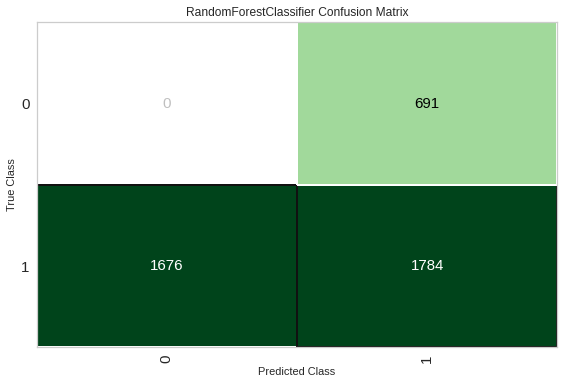

In [78]:
plot_model(rf_mdl, plot = 'confusion_matrix')

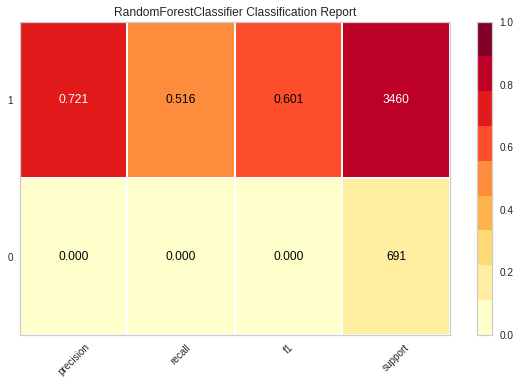

In [79]:
plot_model(rf_mdl, plot = 'class_report')


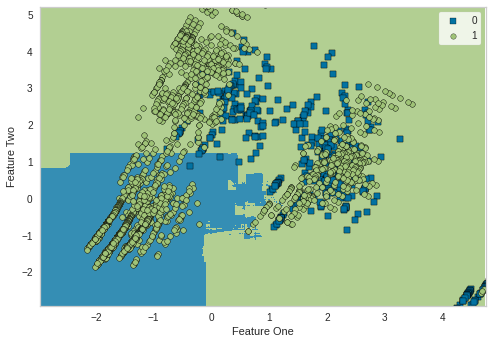

In [80]:
plot_model(rf_mdl, plot='boundary')

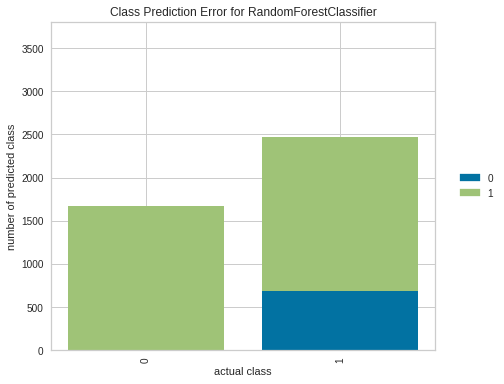

/home/rahul/pythonProects/UAB/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/rahul/pythonProects/UAB/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/rahul/pythonProects/UAB/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/rahul/pythonProects/UAB/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/rahul/pythonProect

In [81]:
plot_model(rf_mdl, plot = 'error')

In [62]:
unseen_predictions = predict_model(rf_mdl, data=data_unseen)
unseen_predictions

,genes,p_val,avg_logFC,Sample ID,outcome,Age,Age group,Gender,FAB subtype,Mutation,Therapeutic regimen,Treatment group,mutations,mutations_order,Label,Score
0,IGLC3,2.961648e-31,4.568750,P-extra2,remission,66,o,F,M2,"IDH2, DNMT3A",DAC,IA_DAC/DAC,IDH2,0.0,remission,0.5600
1,IGLC3,2.961648e-31,4.568750,P-extra2,remission,66,o,F,M2,"IDH2, DNMT3A",DAC,IA_DAC/DAC,DNMT3A,1.0,remission,0.6000
2,IGLC2,1.054148e-22,4.442563,P-extra2,remission,66,o,F,M2,"IDH2, DNMT3A",DAC,IA_DAC/DAC,IDH2,0.0,remission,0.5400
3,IGLC2,1.054148e-22,4.442563,P-extra2,remission,66,o,F,M2,"IDH2, DNMT3A",DAC,IA_DAC/DAC,DNMT3A,1.0,remission,0.6054
4,IGHG4,3.985027e-28,4.413368,P-extra2,remission,66,o,F,M2,"IDH2, DNMT3A",DAC,IA_DAC/DAC,IDH2,0.0,remission,0.5500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,ZNF706,1.704009e-03,0.343940,P-extra2,remission,66,o,F,M2,"IDH2, DNMT3A",DAC,IA_DAC/DAC,DNMT3A,1.0,remission,0.6100
330,KRTCAP2,1.048265e-03,0.312033,P-extra2,remission,66,o,F,M2,"IDH2, DNMT3A",DAC,IA_DAC/DAC,IDH2,0.0,remission,0.5100
331,KRTCAP2,1.048265e-03,0.312033,P-extra2,remission,66,o,F,M2,"IDH2, DNMT3A",DAC,IA_DAC/DAC,DNMT3A,1.0,remission,0.6200
332,CTSS,6.354170e-03,0.268496,P-extra2,remission,66,o,F,M2,"IDH2, DNMT3A",DAC,IA_DAC/DAC,IDH2,0.0,remission,0.5400
